<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/tomato_research_allresnetexcept101v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=30.0, width_shift_range=1.0,height_shift_range=1.0)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_path = '/content/drive/My Drive/research_plant_diseases/plant_data/train/Tomato'
batch_size = 50
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=batch_size,class_mode='categorical')

val_path = '/content/drive/My Drive/research_plant_diseases/plant_data/val/Tomato'
batch_size = 50
validation_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=batch_size,class_mode='categorical')

Found 14523 images belonging to 10 classes.
Found 1812 images belonging to 10 classes.


In [5]:
import pandas as pd
import os
from tensorflow.keras.applications import ResNet50V2,ResNet152V2
from keras.layers import Dense
from keras.models import Sequential

df = pd.DataFrame()
l=[]
d={}
a=0
for folder in os.listdir(train_path):
  for f in os.listdir(os.path.join(train_path,folder)):
    if folder not in d.keys():
      d[folder] = a
      a=a+1
cnts = {}
s=0
for folder in os.listdir(train_path):
  cnts[folder] = len(os.listdir(os.path.join(train_path,folder)))
x = cnts.copy()
for k,v in cnts.items():
  s=s+v
for k,v in cnts.items():
  cnts[k] = v/s
class_weights_vals = list(cnts.values())
class_vals = []
for i in class_weights_vals:
  class_vals.append(1-i)
class_vals
class_weights={}
for i in range(0,10):
  class_weights[i] = class_vals[i]

def create_model(model_name):
  base_model = model_name(include_top=False,weights="imagenet",input_shape=(224,224,3),pooling='max')
  model = Sequential()
  base_model.trainable = False
  model.add(base_model)
  model.add(Dense(units=10,activation='softmax'))
  return model



In [6]:
model = create_model(ResNet50V2) 

94674944/94668760 [==============================] - 1s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [9]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.05)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 1
train_size = 14523
batch_size = 50
val_size = 1812

In [10]:
h1 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

Instructions for updating:
Please use Model.fit, which supports generators.
290/290 [==============================] - 4178s 14s/step - loss: 45.0509 - accuracy: 0.6704 - val_loss: 18.5991 - val_accuracy: 0.7311


In [11]:
opt = Adam(learning_rate=0.15)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
h2 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

290/290 [==============================] - 201s 692ms/step - loss: 82.8199 - acc: 0.7117 - val_loss: 45.2034 - val_acc: 0.8133


In [12]:
epochs=10
opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
h3 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

Epoch 1/10
290/290 [==============================] - 192s 662ms/step - loss: 55.0720 - acc: 0.7829 - val_loss: 59.5532 - val_acc: 0.7883
Epoch 2/10
290/290 [==============================] - 187s 645ms/step - loss: 51.2679 - acc: 0.8037 - val_loss: 80.9505 - val_acc: 0.7772
Epoch 3/10
290/290 [==============================] - 190s 655ms/step - loss: 50.1974 - acc: 0.8182 - val_loss: 70.0942 - val_acc: 0.8061
Epoch 4/10
290/290 [==============================] - 188s 650ms/step - loss: 49.9617 - acc: 0.8297 - val_loss: 51.3663 - val_acc: 0.8517
Epoch 5/10
290/290 [==============================] - 188s 648ms/step - loss: 48.9775 - acc: 0.8314 - val_loss: 76.9709 - val_acc: 0.8256
Epoch 6/10
290/290 [==============================] - 187s 646ms/step - loss: 48.9170 - acc: 0.8391 - val_loss: 62.9750 - val_acc: 0.8300
Epoch 7/10
290/290 [==============================] - 184s 636ms/step - loss: 52.1937 - acc: 0.8423 - val_loss: 83.2221 - val_acc: 0.8056
Epoch 8/10
290/290 [==============

In [13]:
model.save('Resnet50V2_tomato.h5')
from google.colab import files
files.download('Resnet50V2_tomato.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

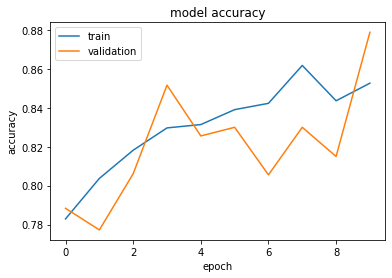

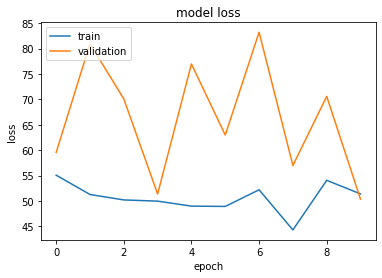

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(h3.history['acc'])
plt.plot(h3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(h3.history['loss'])
plt.plot(h3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
hist_acc = h1.history['accuracy'] + h2.history['acc'] + h3.history['acc']
hist_val_acc = h1.history['val_accuracy'] + h2.history['val_acc'] + h3.history['val_acc']

hist_loss = h1.history['loss'] + h2.history['loss'] + h3.history['loss']
hist_val_loss = h1.history['val_loss'] + h2.history['val_loss'] + h3.history['val_loss']

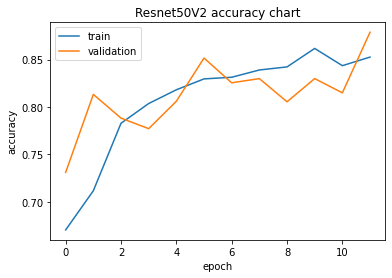

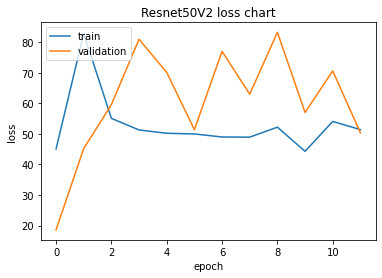

In [16]:
plt.plot(hist_acc)
plt.plot(hist_val_acc)
plt.title('Resnet50V2 accuracy chart')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist_loss)
plt.plot(hist_val_loss)
plt.title('Resnet50V2 loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
test_path = '/content/drive/My Drive/research_plant_diseases/plant_data/test/Tomato'
batch_size = 25
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 1825 images belonging to 10 classes.


In [18]:
preds = model.predict_generator(test_generator,verbose=1)
import numpy as np
y_pred = np.argmax(preds, axis=1)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(test_generator.classes,y_pred)
print(cm)
print('\n\n')
print(classification_report(test_generator.classes,y_pred))

Instructions for updating:
Please use Model.predict, which supports generators.
73/73 [==============================] - 427s 6s/step
[[205   0   0   0   4   0   5   0   0   0]
 [ 12  58   9   0   7   1  11   0   0   2]
 [ 12   3 151   9   7   2   3   1   1   3]
 [  2   0   0  84   2   4   1   0   3   0]
 [ 11   2   5   8 138   2   8   0   2   2]
 [  4   0   1   0   2 151   7   0   1   3]
 [  1   1   0   0   1  12 116   1   0   9]
 [ 19   0   0   2   0   4   2 510   0   0]
 [  0   0   0   1   0   0   0   0  37   0]
 [  0   0   4   0   0   1   4   0   0 151]]



              precision    recall  f1-score   support

           0       0.77      0.96      0.85       214
           1       0.91      0.58      0.71       100
           2       0.89      0.79      0.83       192
           3       0.81      0.88      0.84        96
           4       0.86      0.78      0.81       178
           5       0.85      0.89      0.87       169
           6       0.74      0.82      0.78       141

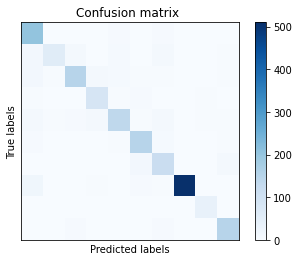

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [20]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Recall = ",recall_score(test_generator.classes,y_pred,average='weighted'))
print("Precision = ",precision_score(test_generator.classes,y_pred,average='weighted'))
print("F1 score = ",f1_score(test_generator.classes,y_pred,average='weighted'))

Recall =  0.8772602739726028
Precision =  0.8841254246936465
F1 score =  0.8763903365978779


In [21]:
model = create_model(ResNet152V2)
model.summary()


234553344/234545216 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 2048)              58331648  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 58,352,138
Trainable params: 20,490
Non-trainable params: 58,331,648
_________________________________________________________________


In [22]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.05)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 1
train_size = 14523
batch_size = 50
val_size = 1812

In [23]:
h1 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

290/290 [==============================] - 225s 776ms/step - loss: 36.6467 - accuracy: 0.6746 - val_loss: 21.8957 - val_accuracy: 0.7672


In [24]:
opt = Adam(learning_rate=0.15)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
h2 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

290/290 [==============================] - 222s 765ms/step - loss: 97.9917 - acc: 0.7119 - val_loss: 50.2013 - val_acc: 0.7994


In [25]:
epochs=10
opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['acc'])
h3 = model.fit_generator(train_generator,epochs=epochs,steps_per_epoch = train_size//batch_size,  verbose=1,validation_data=validation_generator,validation_steps = val_size//batch_size,class_weight=class_weights)

Epoch 1/10
290/290 [==============================] - 220s 758ms/step - loss: 54.6082 - acc: 0.7843 - val_loss: 36.9020 - val_acc: 0.8528
Epoch 2/10
290/290 [==============================] - 216s 745ms/step - loss: 51.5683 - acc: 0.8130 - val_loss: 35.5150 - val_acc: 0.8656
Epoch 3/10
290/290 [==============================] - 216s 747ms/step - loss: 45.8090 - acc: 0.8297 - val_loss: 37.0621 - val_acc: 0.8761
Epoch 4/10
290/290 [==============================] - 215s 742ms/step - loss: 50.2448 - acc: 0.8255 - val_loss: 66.2955 - val_acc: 0.8094
Epoch 5/10
290/290 [==============================] - 216s 746ms/step - loss: 44.7178 - acc: 0.8432 - val_loss: 87.4516 - val_acc: 0.8078
Epoch 6/10
290/290 [==============================] - 215s 742ms/step - loss: 53.0257 - acc: 0.8369 - val_loss: 62.1625 - val_acc: 0.8394
Epoch 7/10
290/290 [==============================] - 216s 743ms/step - loss: 51.0286 - acc: 0.8475 - val_loss: 56.8915 - val_acc: 0.8506
Epoch 8/10
290/290 [==============

In [27]:
model.save('ResNet152V2_tomato.h5')
files.download('ResNet152V2_tomato.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

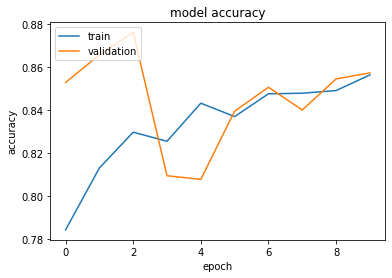

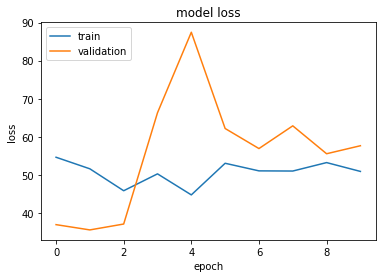

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(h3.history['acc'])
plt.plot(h3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(h3.history['loss'])
plt.plot(h3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


hist_acc = h1.history['accuracy'] + h2.history['acc'] + h3.history['acc']
hist_val_acc = h1.history['val_accuracy'] + h2.history['val_acc'] + h3.history['val_acc']

hist_loss = h1.history['loss'] + h2.history['loss'] + h3.history['loss']
hist_val_loss = h1.history['val_loss'] + h2.history['val_loss'] + h3.history['val_loss']

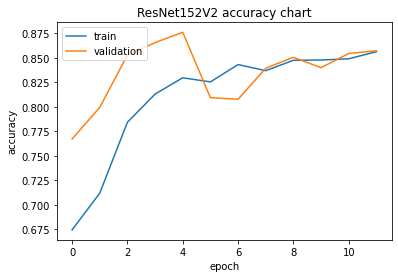

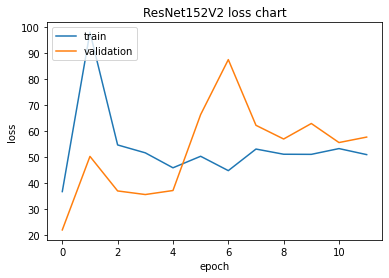

In [29]:
plt.plot(hist_acc)
plt.plot(hist_val_acc)
plt.title('ResNet152V2 accuracy chart')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist_loss)
plt.plot(hist_val_loss)
plt.title('ResNet152V2 loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
preds = model.predict_generator(test_generator,verbose=1)
import numpy as np
y_pred = np.argmax(preds, axis=1)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(test_generator.classes,y_pred)
print(cm)
print('\n\n')
print(classification_report(test_generator.classes,y_pred))


73/73 [==============================] - 14s 198ms/step
[[168   5   0   1  19   5  12   3   0   1]
 [  2  66  14   7   5   1   5   0   0   0]
 [  2   0 171   5   3   5   5   1   0   0]
 [  1   1   1  82   5   5   1   0   0   0]
 [  2   1   1   3 158   3  10   0   0   0]
 [  0   1   0   7   0 156   5   0   0   0]
 [  1   0   0   2   2  21 112   1   0   2]
 [  1   1   1   3   3   5   3 520   0   0]
 [  0   0   2   8   3   6   2   1  16   0]
 [  0   0   3   1   1   8   7   0   0 140]]



              precision    recall  f1-score   support

           0       0.95      0.79      0.86       214
           1       0.88      0.66      0.75       100
           2       0.89      0.89      0.89       192
           3       0.69      0.85      0.76        96
           4       0.79      0.89      0.84       178
           5       0.73      0.92      0.81       169
           6       0.69      0.79      0.74       141
           7       0.99      0.97      0.98       537
           8       1.00

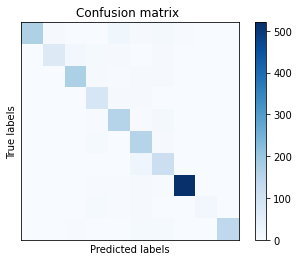

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()


In [32]:
from sklearn.metrics import recall_score,precision_score,f1_score
print("Recall = ",recall_score(test_generator.classes,y_pred,average='weighted'))
print("Precision = ",precision_score(test_generator.classes,y_pred,average='weighted'))
print("F1 score = ",f1_score(test_generator.classes,y_pred,average='weighted'))

Recall =  0.8706849315068493
Precision =  0.8845661074130157
F1 score =  0.8710210327124176
